In [1]:
import myokit
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
nyg = myokit.load_model('models/nygren.mmt')
cou = myokit.load_model('models/courtemanche.mmt')

In [4]:
Cm_nyg = nyg.get('membrane.Cm').value()*1e3 # pF
Cm_cou = cou.get('membrane.Cm').value()     # pF

In [5]:
# 2 Hz pacing protocol
npulses = 1000
period = 1000 # ms
duration = 1 # ms
level = -4000 # pA => -4000/100 = -40 pA/pF
offset = 1000 # ms

pulsetrain_cou = myokit.pacing.blocktrain(period, duration, offset=offset, level=level, limit=npulses)

In [6]:
pace = cou.get('membrane.i_st')
if pace.binding() != 'pace':
    if pace.is_state():
        pace.demote()
    pace.set_rhs(0)
    pace.set_binding('pace')

In [7]:
cou_sim = myokit.Simulation(cou, pulsetrain_cou)

In [8]:
data_cou = cou_sim.run(pulsetrain_cou.characteristic_time())

In [9]:
data_cou = data_cou.trim((npulses-1)*period+offset, (npulses-1)*period+offset+400, adjust=True)

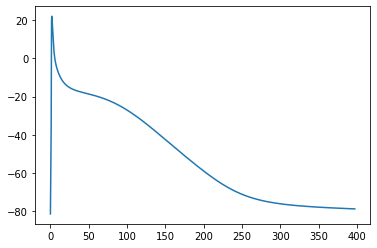

In [10]:
plt.plot(data_cou['environment.time'], data_cou['membrane.V'])

In [11]:
# 2 Hz pacing protocol
npulses = 1000
period = 1 # s
duration = 1e-3 # s
level = -2000 # pA -> -2000/50 = -40 pA/pF
offset = 1 # s

pulsetrain_nyg = myokit.pacing.blocktrain(period, duration, offset=offset, level=level, limit=npulses)

In [12]:
pace = nyg.get('membrane.i_Stim')
if pace.binding() != 'pace':
    if pace.is_state():
        pace.demote()
    pace.set_rhs(0)
    pace.set_binding('pace')
nyg_sim = myokit.Simulation(nyg, pulsetrain_nyg)

In [13]:
data_nyg = nyg_sim.run(pulsetrain_nyg.characteristic_time())
data_nyg = data_nyg.trim((npulses-1)*period+offset, (npulses-1)*period+offset+0.4, adjust=True)

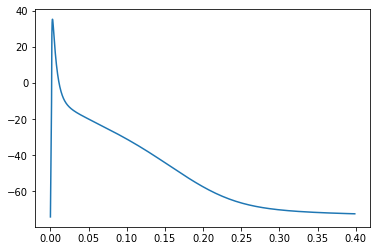

In [14]:
plt.plot(data_nyg['environment.time'], data_nyg['membrane.V'])

In [17]:
data_cou_ina = data_cou.trim_right(5)
data_nyg_ina = data_nyg.trim_right(5e-3)
data_cou_ical = data_cou.trim_right(20)
data_nyg_ical = data_nyg.trim_right(20e-3)
data_cou_ik = data_cou.trim_right(15)
data_nyg_ik = data_nyg.trim_right(15e-3)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


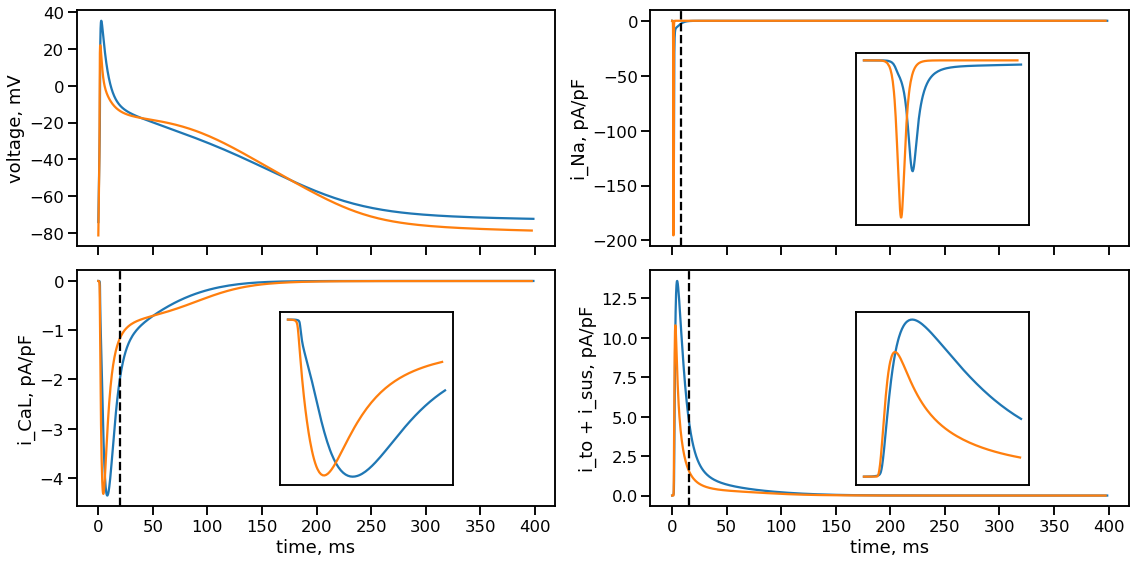

In [33]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(16, 8))
ax = ax.flatten()

# Action potential
ax[0].plot(np.array(data_nyg['environment.time'])*1000, data_nyg['membrane.V'])
ax[0].plot(data_cou['environment.time'], data_cou['membrane.V'])

# Sodium current
ax[1].plot(np.array(data_nyg['environment.time'])*1000, 
           np.array(data_nyg['sodium_current.i_Na'])/Cm_nyg)
ax[1].plot(data_cou['environment.time'], 
           np.array(data_cou['fast_sodium_current.i_Na'])/Cm_cou)
ax[1].axvline(8, linestyle='--', color='k')

ax_ina = plt.axes([.75, .6, .15, .3])
plt.plot(np.array(data_nyg_ina['environment.time'])*1000, 
         np.array(data_nyg_ina['sodium_current.i_Na'])/Cm_nyg)
plt.plot(data_cou_ina['environment.time'],
         np.array(data_cou_ina['fast_sodium_current.i_Na'])/Cm_cou)
plt.setp(ax_ina, xticks=[], yticks=[])
ax_ina.set_xlabel('')
ax_ina.set_ylabel('')

# Calcium current
ax[2].plot(np.array(data_nyg['environment.time'])*1000, 
           np.array(data_nyg['L_type_Ca_channel.i_Ca_L'])/Cm_nyg)
ax[2].plot(data_cou['environment.time'], 
           np.array(data_cou['L_type_Ca_channel.i_Ca_L'])/Cm_cou)
ax[2].axvline(20, linestyle='--', color='k')

ax_ical = plt.axes([.25, .15, .15, .3])
plt.plot(np.array(data_nyg_ical['environment.time'])*1000, 
         np.array(data_nyg_ical['L_type_Ca_channel.i_Ca_L'])/Cm_nyg)
plt.plot(data_cou_ical['environment.time'],
         np.array(data_cou_ical['L_type_Ca_channel.i_Ca_L'])/Cm_cou)
plt.setp(ax_ical, xticks=[], yticks=[])
ax_ical.set_xlabel('')
ax_ical.set_ylabel('')

# Potassium currents
ax[3].plot(np.array(data_nyg['environment.time'])*1000, 
           (np.array(data_nyg['Ca_independent_transient_outward_K_current.i_t'])+
           np.array(data_nyg['sustained_outward_K_current.i_sus']))/Cm_nyg)
ax[3].plot(data_cou['environment.time'], 
           (np.array(data_cou['transient_outward_K_current.i_to'])+
           np.array(data_cou['ultrarapid_delayed_rectifier_K_current.i_Kur']))/Cm_cou)
ax[3].axvline(15, linestyle='--', color='k')

ax_ik = plt.axes([.75, .15, .15, .3])
plt.plot(np.array(data_nyg_ik['environment.time'])*1000, 
         (np.array(data_nyg_ik['Ca_independent_transient_outward_K_current.i_t'])+
          np.array(data_nyg_ik['sustained_outward_K_current.i_sus']))/Cm_nyg)
plt.plot(data_cou_ik['environment.time'],
         (np.array(data_cou_ik['transient_outward_K_current.i_to'])+
           np.array(data_cou_ik['ultrarapid_delayed_rectifier_K_current.i_Kur']))/Cm_cou)
plt.setp(ax_ik, xticks=[], yticks=[])
ax_ik.set_xlabel('')
ax_ik.set_ylabel('')

ax[2].set_xlabel('time, ms')
ax[3].set_xlabel('time, ms')
ax[0].set_ylabel('voltage, mV')
ax[1].set_ylabel('i_Na, pA/pF')
ax[2].set_ylabel('i_CaL, pA/pF')
ax[3].set_ylabel('i_to + i_sus, pA/pF')

plt.tight_layout()

In [34]:
fig.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ap_compare.pdf')